In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Scale

In [21]:
from BOF.get_BOF import ImageProcessor
import albumentations as A

images_path = r"D:\自学计算机\MY_Project\others_work\UNeXt-pytorch\inputs\isic\images"

input_height = 512
input_width = 512

scale_min = 0.1
scale_max = 1.0
scale_list = [round(x * 0.1, 1) for x in range(int(scale_min * 10), int(scale_max * 10) + 1)]
for scale in scale_list:
    save_pkl_path = f".\\scale_isic\\data\\{scale}\\bof.pkl"
    height = int(scale * input_height)
    width = int(scale * input_width)
    train_transform = A.Compose([
                A.RandomCrop(height=height, width=width, p=1.0),  # 随机裁剪
                A.Resize(32, 32),  # 调整大小
                A.Normalize(),  # 标准化
            ])

    temp_image_processor = ImageProcessor(image_path=images_path,save_file_path=save_pkl_path, costume_transform=train_transform)

In [26]:
from BOF.get_BOF import ImageProcessor, CompareBOF

folder = ".\\scale_isic\\data"
test_BOF = CompareBOF(file_path=folder, target_pkl="bof.pkl", aug_name='scale')

[{'r0': (1.2831375588158966, 0.008833220373011028), 'R0': (1.6167607325792752, 0.020351158218232707), 'rk_max_index': (1135.8, 32.8930928244146), 'rk_max': (326.347428378547, 1.5700482510799896), 'Rk_max': (636.173037309146, 2.158794245354917)}, {'r0': (1.480242829293031, 0.011672202931935226), 'R0': (2.1155357714563587, 0.029599713304703956), 'rk_max_index': (1367.1, 26.660207551080067), 'rk_max': (312.44999091236247, 0.6156903876796189), 'Rk_max': (600.2386245247649, 3.8019727391621485)}, {'r0': (1.751973093239446, 0.0217435887455743), 'R0': (2.8474389060251513, 0.05774445088057349), 'rk_max_index': (523.1, 17.971891633572938), 'rk_max': (318.87731425414285, 1.6225782356198073), 'Rk_max': (622.5473209255422, 2.5964788378504977)}, {'r0': (2.1386031228396756, 0.03619069031970349), 'R0': (3.9161236819214866, 0.08563997864749662), 'rk_max_index': (502.6, 28.367430463669265), 'rk_max': (329.95222133514125, 0.862336115763621), 'Rk_max': (638.7051506688775, 2.615647992473487)}, {'r0': (2.45

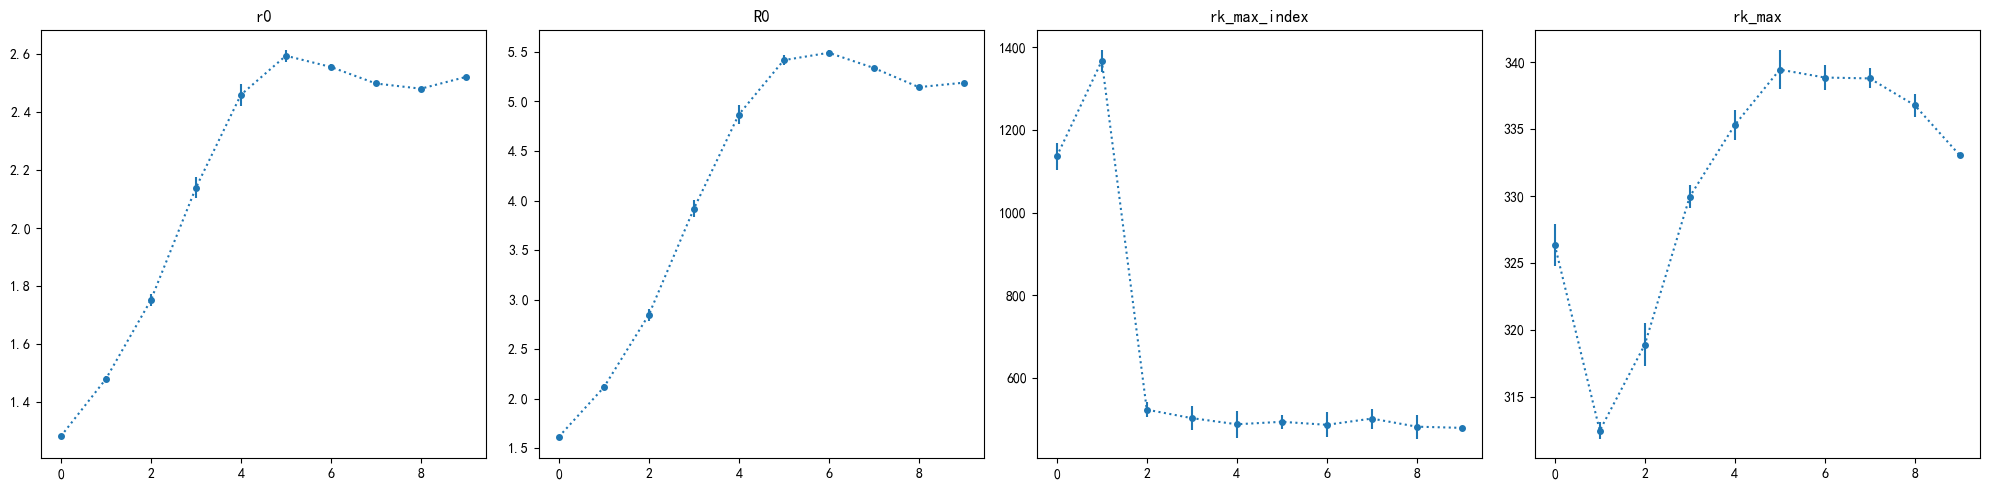

In [32]:
print(test_BOF.comb_BOF)
test_BOF.draw_BOF(net_name="data", aug_name="sacle")

## Angle

In [41]:
from BOF.get_BOF import ImageProcessor
import albumentations as A

images_path = r"D:\自学计算机\MY_Project\others_work\UNeXt-pytorch\inputs\isic\images"

input_height = 512
input_width = 512

min_angle_list = range(90,135,1)
# for min_angle in tqdm(min_angle_list, unit="degree", desc="min_angle"):
for max_angle in min_angle_list:
    # min_angle = -max_angle
    save_pkl_path = f".\\scale_isic\\data\\angle\\{max_angle}\\bof.pkl"
    # height = int(scale * input_height)
    # width = int(scale * input_width)
    train_transform = A.Compose([
                # A.RandomCrop(height=height, width=width, p=1.0),  # 随机裁剪
                A.Rotate(limit=max_angle),  # 角度旋转增强，可设置旋转角度的限制
                A.Resize(32, 32),  # 调整大小
                A.Normalize(),  # 标准化
            ])

    temp_image_processor = ImageProcessor(image_path=images_path,save_file_path=save_pkl_path, costume_transform=train_transform)

[{'r0': (2.5207437975895033, 0.0), 'R0': (5.189049374353965, 0.0), 'rk_max_index': (479, 0.0), 'rk_max': (333.0478952696483, 0.0), 'Rk_max': (644.7883110555906, 0.0)}, {'r0': (2.5181813800317263, 0.00037359412593439734), 'R0': (5.178415522112501, 0.001204657603287164), 'rk_max_index': (518.4, 17.276830985134076), 'rk_max': (332.32115462455624, 0.8429159845561759), 'Rk_max': (640.5994829092434, 2.197463192601682)}, {'r0': (2.5183101276171507, 0.0007552648276489413), 'R0': (5.179882783122431, 0.0028790594871734823), 'rk_max_index': (517.7, 16.472536065962778), 'rk_max': (332.57746952378204, 0.4837555581234268), 'Rk_max': (640.8872653712298, 1.9128060353094034)}, {'r0': (2.5181488257633045, 0.0009611423145192412), 'R0': (5.180209688568283, 0.00352820225403524), 'rk_max_index': (497.1, 22.575552165020362), 'rk_max': (332.5228605764302, 0.4322358366087922), 'Rk_max': (643.3409286816495, 2.558090610468391)}, {'r0': (2.5173680688267486, 0.000669542123005274), 'R0': (5.179251760287382, 0.00284

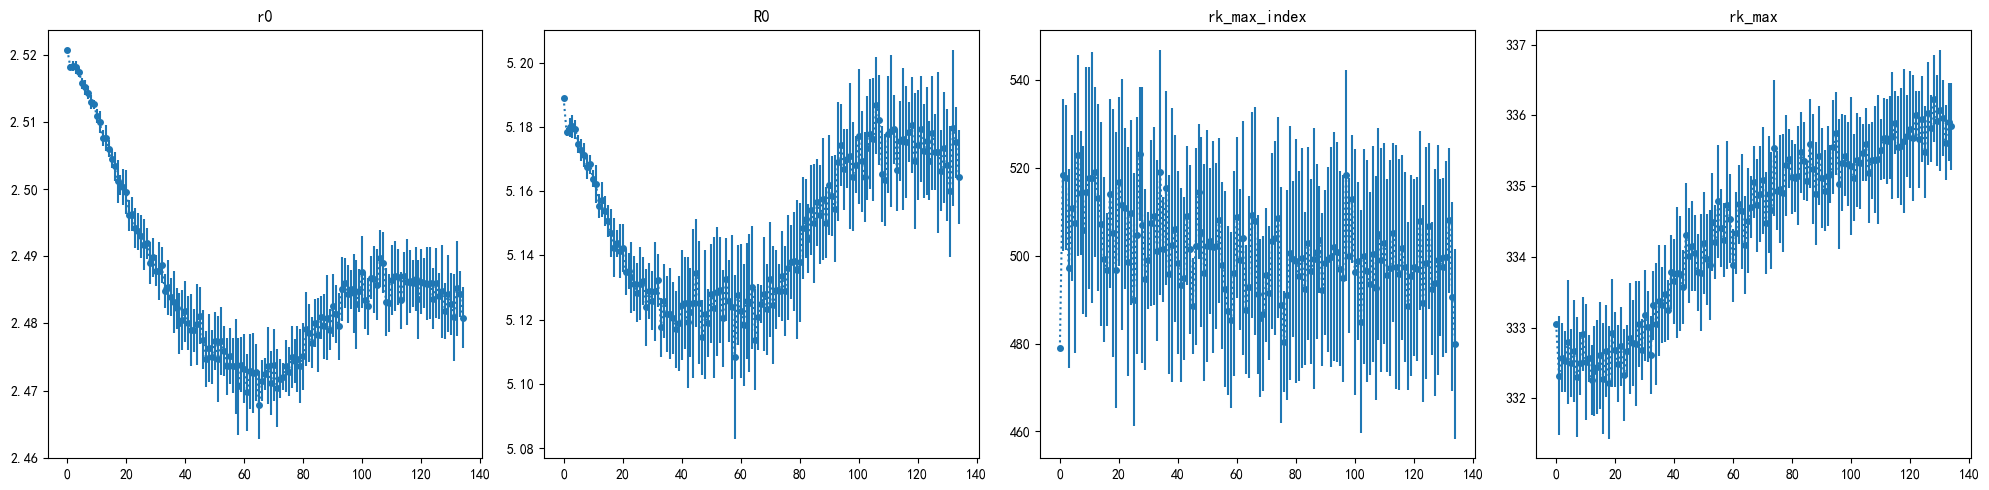

In [42]:
from BOF.get_BOF import ImageProcessor, CompareBOF

folder = ".\\scale_isic\\data\\angle"
test_BOF = CompareBOF(file_path=folder, target_pkl="bof.pkl", aug_name='scale')

print(test_BOF.comb_BOF)
test_BOF.draw_BOF(net_name="data", aug_name="angle")